# Deep-CBN Demo
This notebook demonstrates using the helper functions from `train_deep_cbn_fnx.py` to train the DeepCBN, evaluate, and predict on new datasets in a high-throughput manner. 

In [ ]:
## Import Functions
from train_deep_cbn_fnx import train_deep_cbn, calculate_roc_auc, plot_confusion_matrix, process_multiple_targets,  predict_with_models, label_smiles

# Single Target

In [ ]:
dataset_path = '../Data/tox21.csv' # replace with your dataset
target_col = 'NR-PPAR-gamma' #select column to train one
smiles_col = 'smiles' #annotate SMILES column

# Train a model with minimal epochs for demonstration
model, train_eval, test_eval, X_test, y_test_cat = train_deep_cbn(dataset_path, target_col, smiles_col, n_epochs=100) #keep n_epochs at 100 except for beta-testing

c:\Users\Scott.Coffin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\layer.py:421: UserWarning: `build()` was called on layer 'bi_level_routing_attention_16', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
c:\Users\Scott.Coffin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\layer.py:421: UserWarning: `build()` was called on layer 'bi_level_routing_attention_17', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
c:\Users\Scott.Coffin\AppData\Local\Prog

21/21 ━━━━━━━━━━━━━━━━━━━━ 11s 416ms/step - accuracy: 0.4691 - auc: 0.4662 - f1_score: 0.3249 - loss: 0.6880 - precision: 0.4691 - recall: 0.4691
Restoring model weights from the end of the best epoch: 1.
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9746 - auc: 0.9740 - f1_score: 0.4936 - loss: 0.6836 - precision: 0.9746 - recall: 0.9746
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
21/21 ━━━━━━━━━━━━━━━━━━━━ 16s 612ms/step - accuracy: 0.4359 - auc: 0.5318 - loss: 1.0485
Restoring model weights from the end of the best epoch: 1.
21/21 ━━━━━━━━━━━━━━━━━━━━ 10s 288ms/step - accuracy: 0.6053 - auc: 0.4775 - f1_score: 0.4053 - loss: 0.7783 - precision: 0.6053 - recall: 0.6053
Restoring model weights from the end of the best epoch: 1.
162/162 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - accuracy: 0.0319 - auc: 0.0319 - f1_score: 0.0309 - loss: 0.9539 - precision: 0.0319 - recall: 0.0319
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.0254 - auc: 0.025

41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step


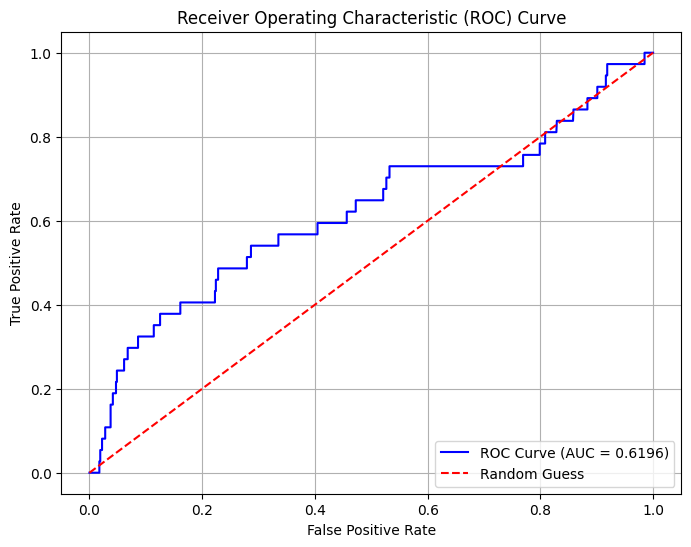

ROC-AUC: 0.6196
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


<Figure size 800x600 with 0 Axes>

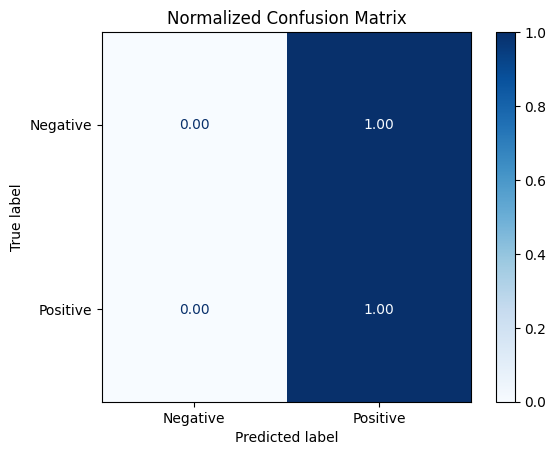

Raw Confusion Matrix:
[[   0 1253]
 [   0   37]]

Normalized Confusion Matrix:
[[0. 1.]
 [0. 1.]]


In [ ]:
# Evaluate using ROC curve and confusion matrix
roc_auc = calculate_roc_auc(model, X_test, y_test_cat)
print(f'ROC-AUC: {roc_auc:.4f}')
plot_confusion_matrix(model, X_test, y_test_cat, class_names=['Negative','Positive'])

# Multiple Targets
For a dataset with multiple target columns (e.g., Tox21), use the process_multiple_targets function as demonstrated below.

In [ ]:
# Target columns to process from dataset
target_cols = ['NR-PPAR-gamma', 'NR-AhR', 'SR-p53']
dataset_path = '../Data/tox21.csv' #target dataset
smiles_col = 'smiles' #annotate SMILES column
n_epochs = 100 # keep this at 100 except for beta-testing

# Call the function
results_df, models_dict = process_multiple_targets(dataset_path, target_cols, smiles_col, n_epochs)

# Display the results dataframe
print(results_df)

Processing target column: NR-PPAR-gamma


c:\Users\Scott.Coffin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\layer.py:421: UserWarning: `build()` was called on layer 'bi_level_routing_attention_4', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
c:\Users\Scott.Coffin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\layer.py:421: UserWarning: `build()` was called on layer 'bi_level_routing_attention_5', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
c:\Users\Scott.Coffin\AppData\Local\Progra

21/21 ━━━━━━━━━━━━━━━━━━━━ 11s 423ms/step - accuracy: 0.7584 - auc: 0.8202 - f1_score: 0.4454 - loss: 0.7493 - precision: 0.7584 - recall: 0.7584
Restoring model weights from the end of the best epoch: 1.
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.0254 - auc: 0.0424 - f1_score: 0.0248 - loss: 0.6984 - precision: 0.0254 - recall: 0.0254
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
21/21 ━━━━━━━━━━━━━━━━━━━━ 16s 604ms/step - accuracy: 0.4853 - auc: 0.4632 - loss: 1.0794
Restoring model weights from the end of the best epoch: 1.
21/21 ━━━━━━━━━━━━━━━━━━━━ 11s 311ms/step - accuracy: 0.6004 - auc: 0.8015 - f1_score: 0.3943 - loss: 1.0640 - precision: 0.6004 - recall: 0.6004
Restoring model weights from the end of the best epoch: 1.
162/162 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - accuracy: 0.9681 - auc: 0.9760 - f1_score: 0.4919 - loss: 0.5295 - precision: 0.9681 - recall: 0.9681
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.9746 - auc: 0.982

c:\Users\Scott.Coffin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\layer.py:421: UserWarning: `build()` was called on layer 'bi_level_routing_attention_8', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
c:\Users\Scott.Coffin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\layer.py:421: UserWarning: `build()` was called on layer 'bi_level_routing_attention_9', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
c:\Users\Scott.Coffin\AppData\Local\Progra

21/21 ━━━━━━━━━━━━━━━━━━━━ 11s 417ms/step - accuracy: 0.4681 - auc: 0.5160 - f1_score: 0.4019 - loss: 0.6947 - precision: 0.4681 - recall: 0.4681
Restoring model weights from the end of the best epoch: 1.
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.1138 - auc: 0.1160 - f1_score: 0.1020 - loss: 0.7005 - precision: 0.1138 - recall: 0.1138
164/164 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
21/21 ━━━━━━━━━━━━━━━━━━━━ 13s 516ms/step - accuracy: 0.5194 - auc: 0.5754 - loss: 0.8804
Restoring model weights from the end of the best epoch: 1.
21/21 ━━━━━━━━━━━━━━━━━━━━ 8s 258ms/step - accuracy: 0.4538 - auc: 0.5959 - f1_score: 0.4076 - loss: 0.6779 - precision: 0.4538 - recall: 0.4538
Restoring model weights from the end of the best epoch: 1.
164/164 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.8841 - auc: 0.9384 - f1_score: 0.4798 - loss: 0.6577 - precision: 0.8841 - recall: 0.8841
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.8864 - auc: 0.9426

c:\Users\Scott.Coffin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\layer.py:421: UserWarning: `build()` was called on layer 'bi_level_routing_attention_12', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
c:\Users\Scott.Coffin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\layer.py:421: UserWarning: `build()` was called on layer 'bi_level_routing_attention_13', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
c:\Users\Scott.Coffin\AppData\Local\Prog

22/22 ━━━━━━━━━━━━━━━━━━━━ 10s 385ms/step - accuracy: 0.9361 - auc: 0.9250 - f1_score: 0.4845 - loss: 0.9352 - precision: 0.9361 - recall: 0.9361
Restoring model weights from the end of the best epoch: 1.
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.0741 - auc: 0.0741 - f1_score: 0.0689 - loss: 0.7006 - precision: 0.0741 - recall: 0.0741
170/170 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
22/22 ━━━━━━━━━━━━━━━━━━━━ 14s 515ms/step - accuracy: 0.5709 - auc: 0.6027 - loss: 0.8178
Restoring model weights from the end of the best epoch: 1.
22/22 ━━━━━━━━━━━━━━━━━━━━ 8s 258ms/step - accuracy: 0.3707 - auc: 0.4920 - f1_score: 0.3110 - loss: 0.7725 - precision: 0.3707 - recall: 0.3707
Restoring model weights from the end of the best epoch: 1.
170/170 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - accuracy: 0.9380 - auc: 0.9591 - f1_score: 0.4840 - loss: 0.6102 - precision: 0.9380 - recall: 0.9380
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9259 - auc: 0.9559

# Predict on New Data
The code below demosntrates how to predict classifications using the models generated above in batch mode. The data used here is simply a subset for demonstration purposes.

In [18]:
import pandas as pd
import numpy as np
from tensorflow.keras.utils import to_categorical

# Load subset of tox21 dataset for predictions
new_data = pd.read_csv('../Data/tox21.csv').dropna(subset=['NR-PPAR-gamma','NR-AhR','SR-p53','smiles']).head(100)
smiles_list = new_data['smiles']

    # Dictionary for converting SMILES characters to numbers
smiles_dict = {
    "#": 29, "%": 30, ")": 31, "(": 1, "+": 32, "-": 33, "/": 34, ".": 2,
    "1": 35, "0": 3, "3": 36, "2": 4, "5": 37, "4": 5, "7": 38, "6": 6,
    "9": 39, "8": 7, "=": 40, "A": 41, "@": 8, "C": 42, "B": 9, "E": 43,
    "D": 10, "G": 44, "F": 11, "I": 45, "H": 12, "K": 46, "M": 47, "L": 13,
    "O": 48, "N": 14, "P": 15, "S": 49, "R": 16, "U": 50, "T": 17, "W": 51,
    "V": 18, "Y": 52, "[": 53, "Z": 19, "]": 54, "\\": 20, "a": 55, "c": 56,
    "b": 21, "e": 57, "d": 22, "g": 58, "f": 23, "i": 59, "h": 24, "m": 60,
    "l": 25, "o": 61, "n": 26, "s": 62, "r": 27, "u": 63, "t": 28, "y": 64,
    " ": 65, ":": 66, ",": 67, "p": 68, "j": 69, "*": 70
    }


def label_smiles(line, MAX_SMI_LEN, smi_ch_ind):
    X = np.zeros(MAX_SMI_LEN, dtype=int)
    for i, ch in enumerate(line[:MAX_SMI_LEN]):
        if ch in smi_ch_ind:
            X[i] = smi_ch_ind[ch]
    return X

X_new = np.array([label_smiles(str(s), 100, smiles_dict) for s in smiles_list])
X_new = to_categorical(X_new, num_classes=71)

target_cols = ['NR-PPAR-gamma','NR-AhR','SR-p53']
X_test_dict = {t: X_new for t in target_cols}
y_test_cat_dict = {t: to_categorical(new_data[t].astype(int), num_classes=2) for t in target_cols}

predictions_df = predict_with_models(models_dict, X_test_dict, y_test_cat_dict)
print(predictions_df)

Predicting for target column: NR-PPAR-gamma
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Accuracy for NR-PPAR-gamma: 0.9900
AUC for NR-PPAR-gamma: 0.8283
Confusion Matrix for NR-PPAR-gamma:
[[99  0]
 [ 1  0]]

Predicting for target column: NR-AhR
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Accuracy for NR-AhR: 0.1200
AUC for NR-AhR: 0.4299
Confusion Matrix for NR-AhR:
[[ 0 88]
 [ 0 12]]

Predicting for target column: SR-p53
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Accuracy for SR-p53: 0.9700
AUC for SR-p53: 0.7320
Confusion Matrix for SR-p53:
[[97  0]
 [ 3  0]]

      target_col  accuracy       auc    confusion_matrix
0  NR-PPAR-gamma      0.99  0.828283   [[99, 0], [1, 0]]
1         NR-AhR      0.12  0.429924  [[0, 88], [0, 12]]
2         SR-p53      0.97  0.731959   [[97, 0], [3, 0]]
